In [13]:
import numpy as np
import matplotlib

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
	
# Set such that PDF fonts export in a manner that they
# are editable in illustrator/affinity
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

# set to define axes linewidths
matplotlib.rcParams['axes.linewidth'] = 0.5

# this defines some prefactors so inline figures look nice
# on a retina macbook. These can be commented out without any
# issue and are solely asthetic.
%matplotlib inline
%config InlineBackend.figure_format='retina'

# UPDATE 2020-12-31 (my preferred font is Avenir...)
font = {'family' : 'arial',
    	'weight' : 'normal'}

matplotlib.rc('font', **font)

from scipy.stats import kde
import pandas as pd
import seaborn as sns



In [8]:
import shephard
from shephard.apis import uniprot, fasta
from shephard.interfaces import si_protein_attributes, si_domains
from sparrow import Protein


### How to use
The cell below must be updated to point a local directory where the [SHEPHARD data from Ginell et al. has been downloaded from](https://github.com/holehouse-lab/supportingdata/tree/master/2022/ginell_2022/shprd_data)

In [9]:

# link to the directory at https://github.com/holehouse-lab/supportingdata/tree/master/2022/ginell_2022/shprd_data
shephard_data_dir = '<base_dir> 2022/ginell_2022/shprd_data/'

In [10]:
#             
datasets = {'arabidopsis':[],
            'e_coli': [],
            'pombe':[],
            'yeast':[],
            'human':[],
            'xenopus':[]}
           
            

datasets['arabidopsis'].append(f'{shephard_data_dir}/arabidopsis/arabidopsis_clean.fasta')
datasets['arabidopsis'].append(f'{shephard_data_dir}/arabidopsis/shprd_domains_idrs_arabidopsis.tsv')

datasets['e_coli'].append(f'{shephard_data_dir}/e_coli/ecoli_clean.fasta')
datasets['e_coli'].append(f'{shephard_data_dir}/e_coli/shprd_domains_idrs_ecoli.tsv')


datasets['pombe'].append(f'{shephard_data_dir}/pombe/pombe_clean.fasta')
datasets['pombe'].append(f'{shephard_data_dir}/pombe/shprd_domains_idrs_pombe.tsv')

datasets['yeast'].append(f'{shephard_data_dir}/yeast/s_cerevisiae_clean.fasta')
datasets['yeast'].append(f'{shephard_data_dir}/yeast/shprd_domains_idrs_s_cerevisiae.tsv')

datasets['human'].append(f'{shephard_data_dir}/human_proteome_validated.fasta')
datasets['human'].append(f'{shephard_data_dir}/shprd_domains_idrs_metapredict_v2.tsv')

datasets['xenopus'].append(f'{shephard_data_dir}/xenopus/xenopus_clean.fasta')
datasets['xenopus'].append(f'{shephard_data_dir}/xenopus/shprd_domains_idrs_xenopus.tsv')



all_proteomes = {}
for i in datasets:
    print(f'Parsing data for {i}')
    tmp = uniprot.uniprot_fasta_to_proteome(datasets[i][0])
    si_domains.add_domains_from_file(tmp, datasets[i][1])
    # associate the Proteome with the dictionary
    all_proteomes[i] = tmp
    
    


Parsing data for arabidopsis
Parsing data for e_coli
Parsing data for pombe
Parsing data for yeast
Parsing data for human
Parsing data for xenopus


In [11]:
for species in datasets:
    proteome = all_proteomes[species]
    print(f"{species} has {len(proteome)} proteins")


arabidopsis has 39319 proteins
e_coli has 4438 proteins
pombe has 5122 proteins
yeast has 6060 proteins
human has 20393 proteins
xenopus has 49880 proteins


<Figure size 1050x350 with 0 Axes>

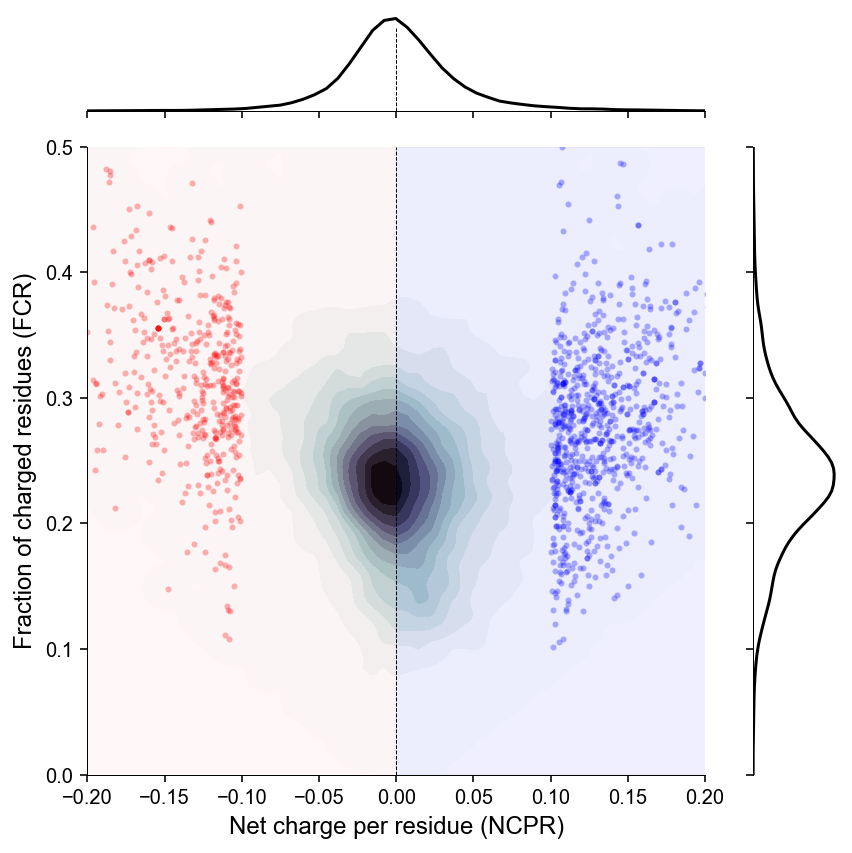

<Figure size 1050x350 with 0 Axes>

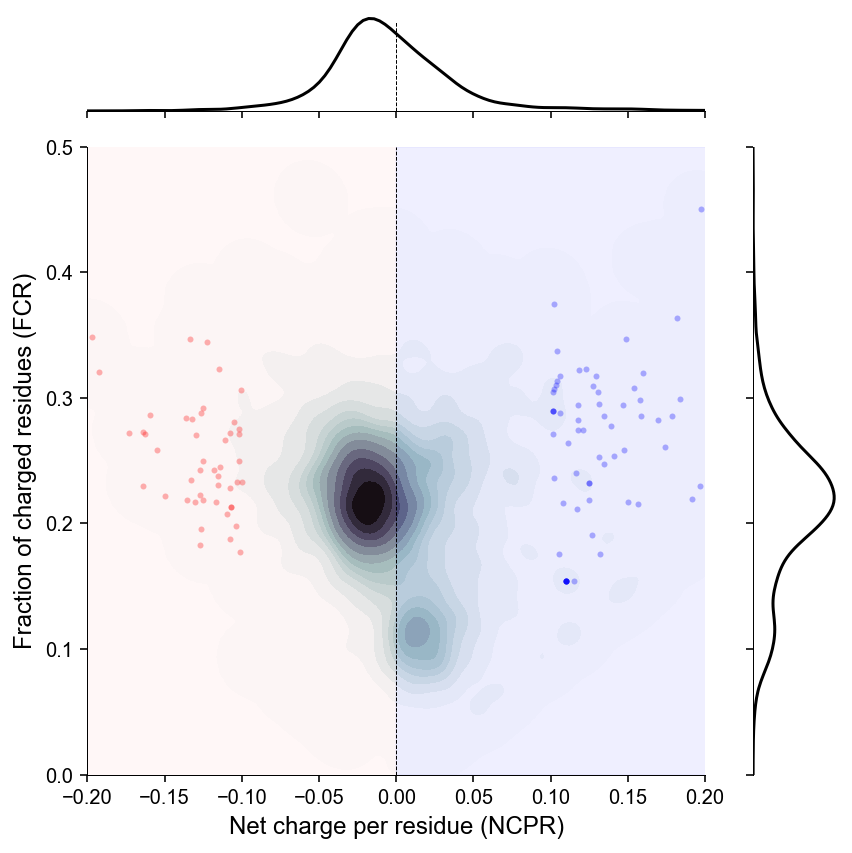

<Figure size 1050x350 with 0 Axes>

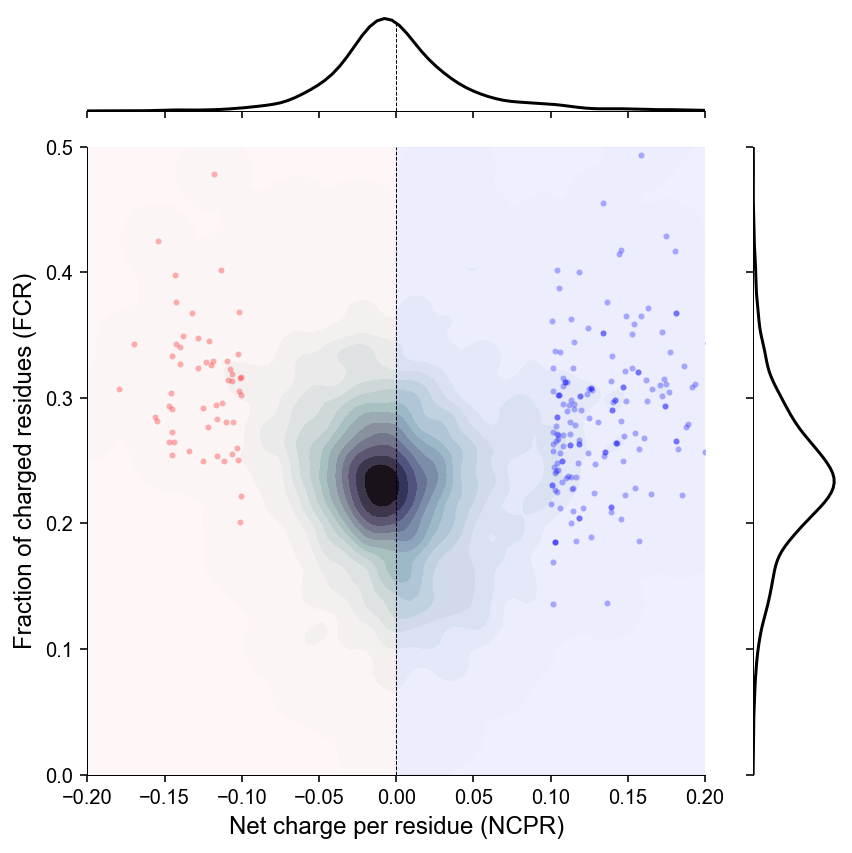

<Figure size 1050x350 with 0 Axes>

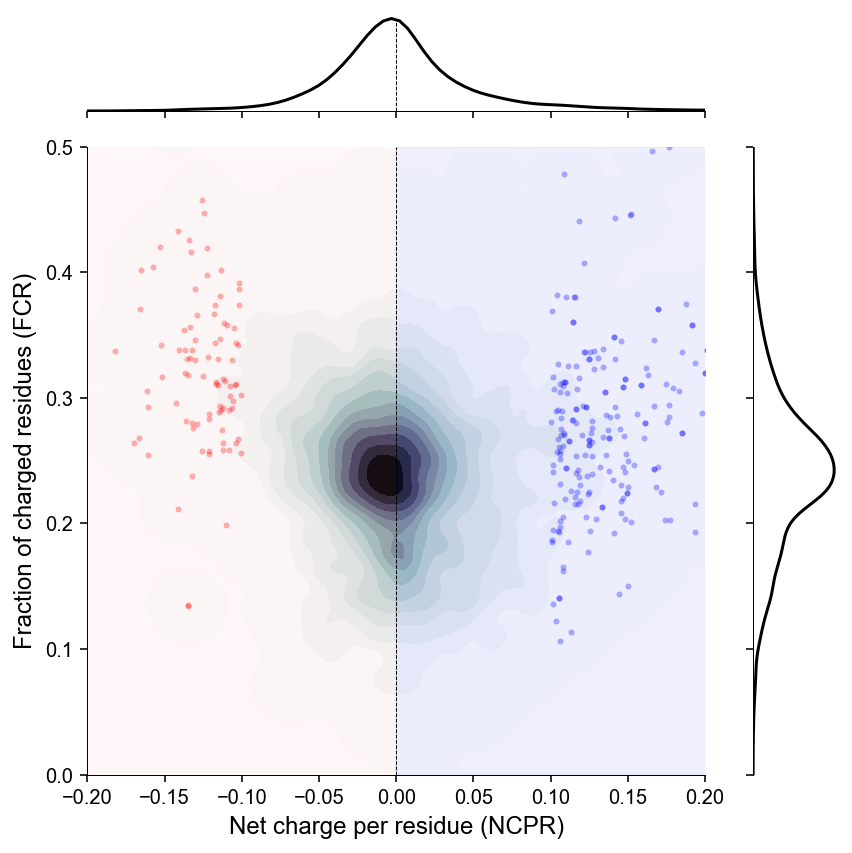

<Figure size 1050x350 with 0 Axes>

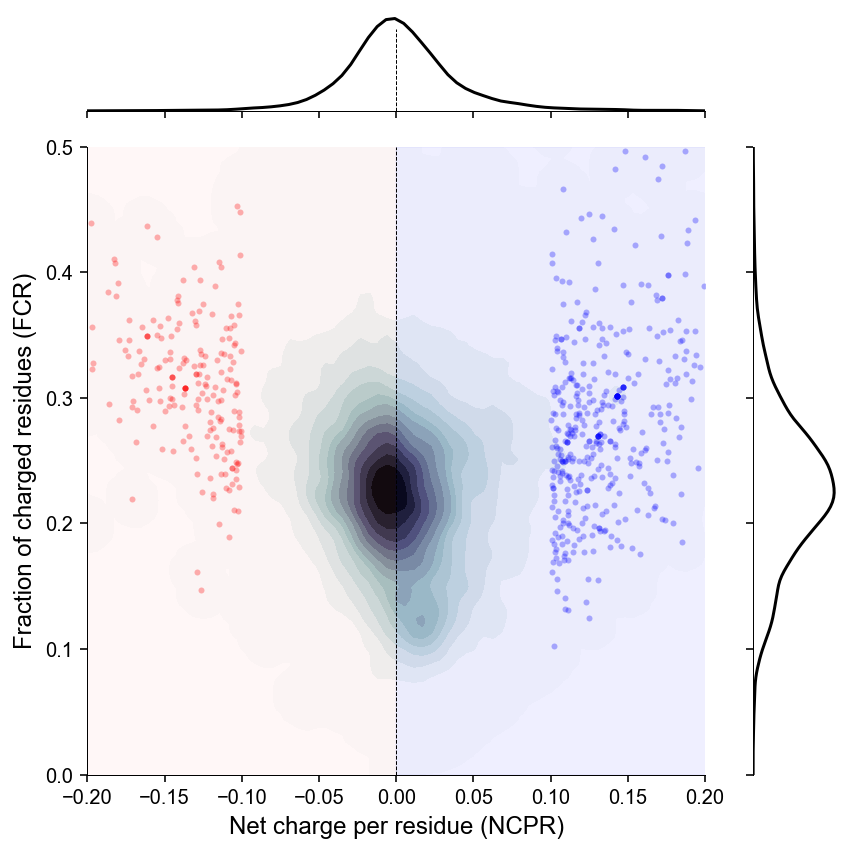

<Figure size 1050x350 with 0 Axes>

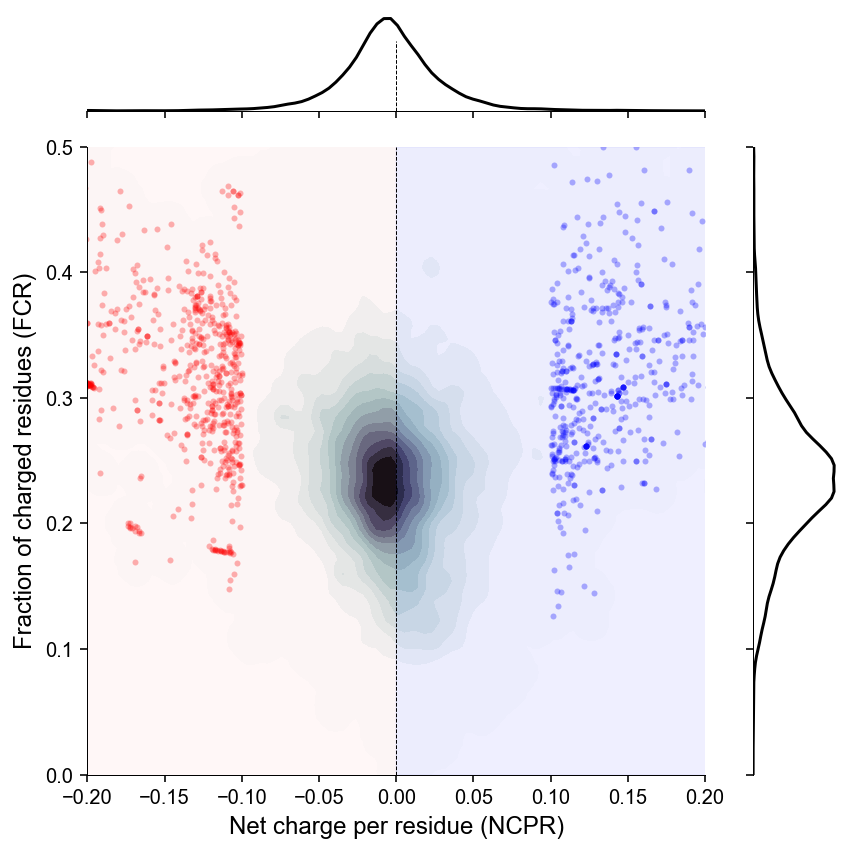

In [14]:
for species in datasets:
    proteome = all_proteomes[species]

    fcr = []
    ncpr = []
    seqlen = []
    for p in proteome:
        sp = Protein(p.sequence)
        fcr.append(sp.FCR)
        ncpr.append(sp.NCPR)
        seqlen.append(len(sp))

    data = [ncpr,fcr]
    
    
    figure(None, (3,1), dpi=350)
    g = sns.jointplot(x=ncpr, y=fcr, kind='kde', cmap="bone_r",thresh=0.00001,shade=True, bw_adjust=0.6, levels=14, 
                 marginal_kws={'color':'k'})
    #sns.kdeplot(x=ncpr, y=fcr, cmap="bone_r",thresh=0.00001,shade=True, bw_adjust=0.6, levels=25)

    for idx in range(len(ncpr)):

        if seqlen[idx] > 50:
            if ncpr[idx] > 0.1:
                g.ax_joint.plot(ncpr[idx], fcr[idx], '.b', ms=6, mew=0, alpha=0.3)
            elif ncpr[idx] < -0.1:
                g.ax_joint.plot(ncpr[idx], fcr[idx], '.r', ms=6, mew=0, alpha=0.3)


    g.ax_joint.set_xlim([-0.2,0.2])
    g.ax_joint.set_ylim([0,0.5])
    g.ax_joint.plot([0,0],[0,0.5],'--k',linewidth=0.5)
    g.ax_joint.axvspan(0,2, color='b', alpha=0.03)
    g.ax_joint.axvspan(0,0.2, color='b', alpha=0.03, linewidth=0)
    g.ax_joint.axvspan(-0.2,0, color='r', alpha=0.03, linewidth=0)
    g.ax_marg_x.plot([0,0],[0,12.5],'--k',linewidth=0.5)

    g.ax_joint.set_xlabel('Net charge per residue (NCPR)', fontsize=12)
    g.ax_joint.set_ylabel('Fraction of charged residues (FCR)', fontsize=12)
    plt.tight_layout()

    plt.savefig(f'figures/{species}_proteome.pdf')

